# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [72]:
!pip install chart_studio

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio
from collections import Counter

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/6_Donors_choose_NB/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/6_Donors_choose_NB/resources.csv')

In [76]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [77]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [81]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [83]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [85]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [86]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [87]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [89]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())


100%|██████████| 109248/109248 [01:05<00:00, 1664.03it/s]


In [90]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [0]:
project_data['preprocessed_essays'] = preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [92]:
# similarly you can preprocess the titles also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())


100%|██████████| 109248/109248 [00:02<00:00, 38236.66it/s]


In [0]:
project_data['preprocessed_title'] = preprocessed_title

## 1.5 Preparing data for models

with all 100k points system crashes so randomly taking 70k points

In [0]:
copy_data=project_data.copy()
project_data = copy_data.sample(n = 70000)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(project_data,project_data['project_is_approved'],test_size=0.2,random_state=42,stratify=project_data[['project_is_approved']])


we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - essay : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [96]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['clean_categories'].values)
categories_one_hot_train = vectorizer.transform(x_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(x_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (56000, 9)
Shape of matrix after one hot encodig  (14000, 9)


In [97]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['clean_subcategories'].values)
sub_categories_one_hot_train = vectorizer.transform(x_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(x_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (56000, 30)
Shape of matrix after one hot encodig  (14000, 30)


In [98]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['school_state'].values)
school_state_one_hot_train = vectorizer.transform(x_train['school_state'].values)
school_state_one_hot_test = vectorizer.transform(x_test['school_state'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",school_state_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (56000, 30)
Shape of matrix after one hot encodig  (14000, 30)


In [99]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['project_grade_category'].values)
project_grade_category_one_hot_train = vectorizer.transform(x_train['project_grade_category'].values)
project_grade_category_one_hot_test = vectorizer.transform(x_test['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (56000, 30)
Shape of matrix after one hot encodig  (14000, 30)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [100]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(x_train['preprocessed_essays'])
essay_bow_train = vectorizer.transform(x_train['preprocessed_essays'])
essay_bow_test = vectorizer.transform(x_test['preprocessed_essays'])
print("Shape of matrix after one hot encodig ",essay_bow_train.shape)
print("Shape of matrix after one hot encodig ",essay_bow_test.shape)

Shape of matrix after one hot encodig  (56000, 12752)
Shape of matrix after one hot encodig  (14000, 12752)


In [101]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(x_train['preprocessed_title'])
title_bow_train = vectorizer.transform(x_train['preprocessed_title'])
title_bow_test = vectorizer.transform(x_test['preprocessed_title'])
print("Shape of matrix after one hot encodig ",title_bow_train.shape)
print("Shape of matrix after one hot encodig ",title_bow_test.shape)

Shape of matrix after one hot encodig  (56000, 2271)
Shape of matrix after one hot encodig  (14000, 2271)


#### 1.5.2.2 TFIDF vectorizer

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['preprocessed_essays'])
essay_tfidf_train = vectorizer.transform(x_train['preprocessed_essays'])
essay_tfidf_test = vectorizer.transform(x_test['preprocessed_essays'])
print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",essay_tfidf_test.shape)

Shape of matrix after one hot encodig  (56000, 12752)
Shape of matrix after one hot encodig  (14000, 12752)


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['preprocessed_title'])
title_tfidf_train = vectorizer.transform(x_train['preprocessed_title'])
title_tfidf_test = vectorizer.transform(x_test['preprocessed_title'])
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)

Shape of matrix after one hot encodig  (56000, 2271)
Shape of matrix after one hot encodig  (14000, 2271)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [104]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/6_Donors_choose_NB/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [106]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_train.append(vector)

print(len(avg_w2v_vectors_essay_train))
print(len(avg_w2v_vectors_essay_train[0]))


100%|██████████| 56000/56000 [00:19<00:00, 2898.78it/s]

56000
300


In [107]:
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_test.append(vector)

print(len(avg_w2v_vectors_essay_test))
print(len(avg_w2v_vectors_essay_test[0]))


100%|██████████| 14000/14000 [00:04<00:00, 2919.03it/s]

14000
300


In [108]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))


100%|██████████| 56000/56000 [00:00<00:00, 61457.29it/s]

56000
300


In [109]:
avg_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_test.append(vector)

print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))


100%|██████████| 14000/14000 [00:00<00:00, 56157.72it/s]

14000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [111]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_train.append(vector)

print(len(tfidf_w2v_vectors_essay_train))
print(len(tfidf_w2v_vectors_essay_train[0]))


100%|██████████| 56000/56000 [02:00<00:00, 465.83it/s]

56000
300


In [112]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_test.append(vector)

print(len(tfidf_w2v_vectors_essay_test))
print(len(tfidf_w2v_vectors_essay_test[0]))


100%|██████████| 14000/14000 [00:30<00:00, 464.37it/s]

14000
300


In [0]:
# Similarly you can vectorize for title also
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [114]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))


100%|██████████| 56000/56000 [00:02<00:00, 20046.15it/s]

56000
300


In [115]:
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))


100%|██████████| 14000/14000 [00:00<00:00, 24263.85it/s]

14000
300


### 1.5.3 Vectorizing Numerical features

In [116]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

project_num_scalar = StandardScaler()
project_num_scalar.fit(x_train['teacher_number_of_previously_posted_projects' ].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {project_num_scalar.mean_[0]}, Standard deviation : {np.sqrt(project_num_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
num_standardized_train = project_num_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.168535714285714, Standard deviation : 27.712554968026087


In [117]:
project_num_scalar = StandardScaler()
project_num_scalar.fit(x_test['teacher_number_of_previously_posted_projects' ].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {project_num_scalar.mean_[0]}, Standard deviation : {np.sqrt(project_num_scalar.var_[0])}")
num_standardized_test = project_num_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 10.927214285714285, Standard deviation : 27.06163709459936


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

merging all one hot encoded features

In [0]:
from scipy.sparse import hstack
x_tr_ohe = hstack((num_standardized_train,project_grade_category_one_hot_train,school_state_one_hot_train,sub_categories_one_hot_train,categories_one_hot_train))
x_te_ohe = hstack((num_standardized_test,project_grade_category_one_hot_test,school_state_one_hot_test,sub_categories_one_hot_test,categories_one_hot_test))

In [119]:
print(x_tr_ohe.shape)
print(x_te_ohe.shape)

(56000, 100)
(14000, 100)


ohe + bow

In [120]:
print(essay_bow_test.shape)

(14000, 12752)


In [121]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tr_bow = hstack((x_tr_ohe,essay_bow_train,title_bow_train)).tocsr()
print(x_tr_bow.shape)
x_te_bow = hstack((x_te_ohe,essay_bow_test,title_bow_test)).tocsr()
print(x_te_bow.shape)

(56000, 15123)
(14000, 15123)


ohe + tfidf

In [122]:
x_tfidf_train = hstack((x_tr_ohe,essay_tfidf_train,title_tfidf_train))
x_tfidf_test = hstack((x_te_ohe,essay_tfidf_test,title_tfidf_test))
print(x_tfidf_train.shape)
print(x_tfidf_test.shape)

(56000, 15123)
(14000, 15123)


ohe + w2v

In [123]:
x_w2v_train = hstack((x_tr_ohe,avg_w2v_vectors_essay_train,avg_w2v_vectors_title_train))
x_w2v_test = hstack((x_te_ohe,avg_w2v_vectors_essay_test,avg_w2v_vectors_title_test))
print(x_w2v_train.shape)
print(x_w2v_test.shape)

(56000, 700)
(14000, 700)


ohe + tfidf w2v

In [124]:
x_tfidfw2v_train = hstack((x_tr_ohe,tfidf_w2v_vectors_essay_train,tfidf_w2v_vectors_title_train))
x_tfidfw2v_test = hstack((x_te_ohe,tfidf_w2v_vectors_essay_test,tfidf_w2v_vectors_title_test))
print(x_tfidfw2v_train.shape)
print(x_tfidfw2v_test.shape)

(56000, 700)
(14000, 700)


In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [126]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [127]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [128]:
neg = []
pos = []
neu = []
compound = []
for a in tqdm(x_train['preprocessed_essays']) :
  b = sid.polarity_scores(a)['neg']
  c = sid.polarity_scores(a)['pos']
  d = sid.polarity_scores(a)['neu']
  e = sid.polarity_scores(a)['compound']
  neg.append(b)
  pos.append(c)
  neu.append(d)
  compound.append(e)

x_train["pos"] = pos
x_train["neg"] = neg
x_train["neu"] = neu
x_train["compound"] = compound


100%|██████████| 56000/56000 [07:11<00:00, 129.79it/s]


In [129]:
neg = []
pos = []
neu = []
compound = []
for a in tqdm(x_test['preprocessed_essays']) :
  b = sid.polarity_scores(a)['neg']
  c = sid.polarity_scores(a)['pos']
  d = sid.polarity_scores(a)['neu']
  e = sid.polarity_scores(a)['compound']
  neg.append(b)
  pos.append(c)
  neu.append(d)
  compound.append(e)

x_test["pos"] = pos
x_test["neg"] = neg
x_test["neu"] = neu
x_test["compound"] = compound


100%|██████████| 14000/14000 [01:47<00:00, 130.06it/s]


In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train['pos'].values.reshape(1,-1))
essay_sent_pos_tr = normalizer.transform(x_train['pos'].values.reshape(1,-1))
essay_sent_pos_te = normalizer.transform(x_test['pos'].values.reshape(1,-1))

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train['neg'].values.reshape(1,-1))
essay_sent_neg_tr = normalizer.transform(x_train['neg'].values.reshape(1,-1))
essay_sent_neg_te = normalizer.transform(x_test['neg'].values.reshape(1,-1))

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train['neu'].values.reshape(1,-1))
essay_sent_neu_tr = normalizer.transform(x_train['neu'].values.reshape(1,-1))
essay_sent_neu_te = normalizer.transform(x_test['neu'].values.reshape(1,-1))

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train['compound'].values.reshape(1,-1))
essay_sent_comp_tr = normalizer.transform(x_train['compound'].values.reshape(1,-1))
essay_sent_comp_te = normalizer.transform(x_test['compound'].values.reshape(1,-1))

In [0]:
for col_type, new_col in [('project_title', 'title_size'), ('essay', 'essay_size')]:
    col_data = x_train[col_type]
    col_size = []
    for sen in col_data:
        sen = decontracted(sen)
        col_size.append(len(sen.split()))
    x_train[new_col] = col_size

In [0]:
for col_type, new_col in [('project_title', 'title_size'), ('essay', 'essay_size')]:
    col_data = x_test[col_type]
    col_size = []
    for sen in col_data:
        sen = decontracted(sen)
        col_size.append(len(sen.split()))
    x_test[new_col] = col_size

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train['title_size'].values.reshape(1,-1))
title_size_tr = normalizer.transform(x_train['title_size'].values.reshape(1,-1))
title_size_te = normalizer.transform(x_test['title_size'].values.reshape(1,-1))

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train['essay_size'].values.reshape(1,-1))
essay_size_tr = normalizer.transform(x_train['essay_size'].values.reshape(1,-1))
essay_size_te = normalizer.transform(x_test['essay_size'].values.reshape(1,-1))

In [0]:
essay_sent_pos_tr = (x_train['pos'].values.reshape(-1,1))
essay_sent_neg_tr = (x_train['neg'].values.reshape(-1,1))
essay_sent_neu_tr = (x_train['neu'].values.reshape(-1,1))
essay_sent_comp_tr = (x_train['compound'].values.reshape(-1,1))
essay_sent_pos_te = (x_test['pos'].values.reshape(-1,1))
essay_sent_neg_te = (x_test['neg'].values.reshape(-1,1))
essay_sent_neu_te = (x_test['neu'].values.reshape(-1,1))
essay_sent_comp_te = (x_test['compound'].values.reshape(-1,1))


In [0]:
title_size_tr=(x_train['title_size'].values.reshape(-1,1))
essay_size_tr=(x_train['essay_size'].values.reshape(-1,1))
title_size_te=(x_test['title_size'].values.reshape(-1,1))
essay_size_te=(x_test['essay_size'].values.reshape(-1,1))

truncated svd on tfidf essay

In [140]:
print(essay_tfidf_train.shape)
print(essay_tfidf_test.shape)

(56000, 12752)
(14000, 12752)



100%|██████████| 6/6 [08:33<00:00, 85.55s/it] 


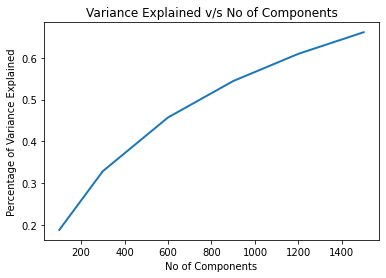

In [141]:
#https://www.programcreek.com/python/example/85921/sklearn.decomposition.TruncatedSVD
from sklearn.decomposition import TruncatedSVD
dimensions=[100,300,600,900,1200,1500]
variance_sum_tr=[]

for i in tqdm(dimensions):
    svd = TruncatedSVD(n_components=i, n_iter=5 ,random_state=None)
    svd.fit(essay_tfidf_train)
    variance_sum_tr.append(svd.explained_variance_ratio_.sum())

plt.xlabel("No of Components")
plt.ylabel("Percentage of Variance Explained")
plt.title("Variance Explained v/s No of Components")
plt.plot(dimensions,variance_sum_tr,lw=2)
plt.show()

In [0]:
dim = 1500
svd = TruncatedSVD(n_components=dim, n_iter=5)
svd.fit(essay_tfidf_train)
x_train_essays_svd=svd.transform(essay_tfidf_train)
x_test_essays_svd=svd.transform(essay_tfidf_test)

Task 5

In [144]:
X5_tr = hstack((x_tr_ohe, essay_sent_pos_tr,essay_sent_neg_tr,essay_sent_neu_tr,essay_sent_comp_tr,title_size_tr,essay_size_tr,x_train_essays_svd))
X5_te = hstack((x_te_ohe, essay_sent_pos_te,essay_sent_neg_te,essay_sent_neu_te,essay_sent_comp_te,title_size_te,essay_size_te,x_test_essays_svd))
print(X5_tr.shape)
print(X5_te.shape)

(56000, 1606)
(14000, 1606)


# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label



<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

BOW

In [148]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
import math

parameters={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
svm = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(svm, parameters, cv=10, scoring='roc_auc',verbose=1,return_train_score=True)
clf.fit(x_tr_bow, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
bestAlpha_1=clf.best_params_['alpha']
bestScore_1=clf.best_score_
print("Best alpha: ",clf.best_params_['alpha']," BEST SCORE: ",clf.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


Best alpha:  0.01  BEST SCORE:  0.7184952116366947


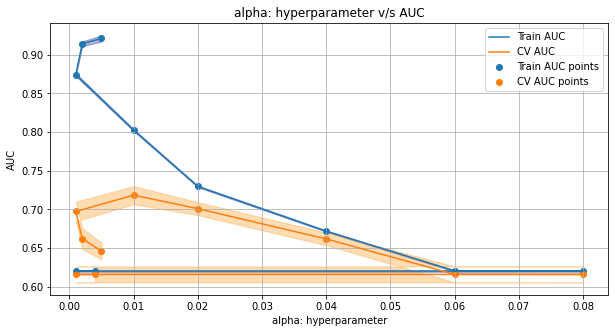

In [149]:
alphas = [0.005,0.002,0.001,0.01,0.02,0.04,0.06,0.08,0.001,0.004]
plt.figure(figsize=(10,5))
plt.plot(alphas, train_auc, label='Train AUC')
plt.gca().fill_between(alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(alphas, cv_auc, label='CV AUC')
plt.gca().fill_between(alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(alphas, train_auc, label='Train AUC points')
plt.scatter(alphas, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

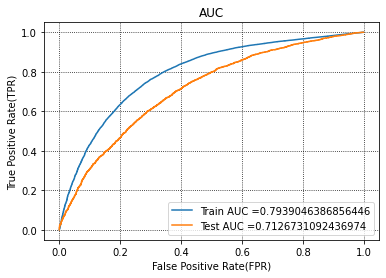

In [150]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV  #https://github.com/scikit-learn/scikit-learn/issues/7278

svm = SGDClassifier(alpha=bestAlpha_1,loss='hinge',class_weight='balanced')
svm.fit(x_tr_bow, y_train)
y_train_pred=svm.decision_function(x_tr_bow)  ##https://stats.stackexchange.com/questions/85966/using-predict-proba-with-sklearns-multiclass-svc
y_test_pred=svm.decision_function(x_te_bow)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
ax = plt.subplot()
auc_set1_train=auc(train_fpr, train_tpr)
auc_set1_test=auc(test_fpr, test_tpr)
ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5333908353657575 for threshold -0.265
[[ 6015  2386]
 [12139 35460]]
the maximum value of tpr*(1-fpr) 0.5333908353657575 for threshold -0.265


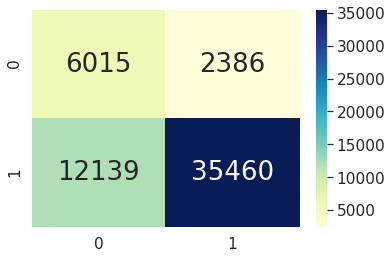

In [152]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
## https://likegeeks.com/seaborn-heatmap-tutorial/#Sequential-colormap
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4333797519007603 for threshold 0.574
[[1821  279]
 [7504 4396]]
the maximum value of tpr*(1-fpr) 0.4333797519007603 for threshold 0.574


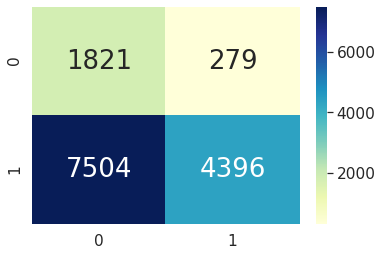

In [153]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

TFIDF

In [154]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
import math

parameters={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
svm = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(svm, parameters, cv=10, scoring='roc_auc',verbose=1,return_train_score=True)
clf.fit(x_tfidf_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
bestAlpha_2=clf.best_params_['alpha']
bestScore_2=clf.best_score_
print("Best alpha: ",clf.best_params_['alpha']," BEST SCORE: ",clf.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


Best alpha:  0.0001  BEST SCORE:  0.7088415257743451


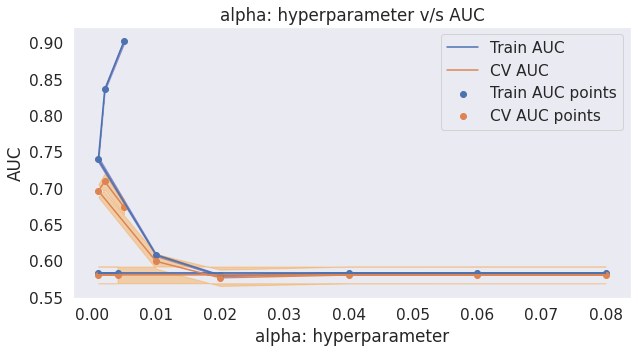

In [155]:
alphas = [0.005,0.002,0.001,0.01,0.02,0.04,0.06,0.08,0.001,0.004]
plt.figure(figsize=(10,5))
plt.plot(alphas, train_auc, label='Train AUC')
plt.gca().fill_between(alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(alphas, cv_auc, label='CV AUC')
plt.gca().fill_between(alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(alphas, train_auc, label='Train AUC points')
plt.scatter(alphas, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

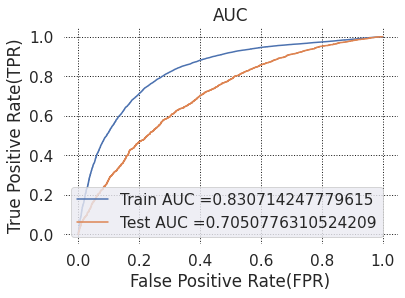

In [156]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV  #https://github.com/scikit-learn/scikit-learn/issues/7278

svm = SGDClassifier(alpha=bestAlpha_2,loss='hinge',class_weight='balanced')
svm.fit(x_tfidf_train, y_train)
y_train_pred=svm.decision_function(x_tfidf_train)
y_test_pred=svm.decision_function(x_tfidf_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
ax = plt.subplot()
auc_set1_train=auc(train_fpr, train_tpr)
auc_set1_test=auc(test_fpr, test_tpr)
ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5814972336182958 for threshold -0.083
[[ 6226  2175]
 [10251 37348]]
the maximum value of tpr*(1-fpr) 0.5814972336182958 for threshold -0.083


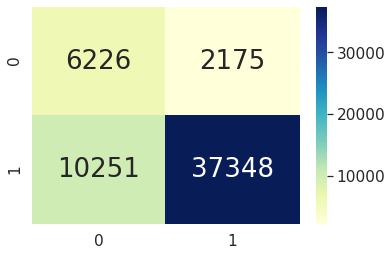

In [158]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
## https://likegeeks.com/seaborn-heatmap-tutorial/#Sequential-colormap
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4248199279711885 for threshold 0.682
[[1748  352]
 [6908 4992]]
the maximum value of tpr*(1-fpr) 0.4248199279711885 for threshold 0.682


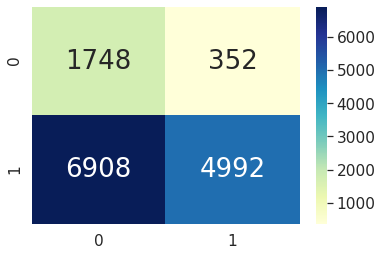

In [159]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

W2V

In [160]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
import math

parameters={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
svm = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(svm, parameters, cv=10, scoring='roc_auc',verbose=1,return_train_score=True)
clf.fit(x_w2v_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
bestAlpha_3=clf.best_params_['alpha']
bestScore_3=clf.best_score_
print("Best alpha: ",clf.best_params_['alpha']," BEST SCORE: ",clf.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.5min finished


Best alpha:  0.0001  BEST SCORE:  0.6955256356349645


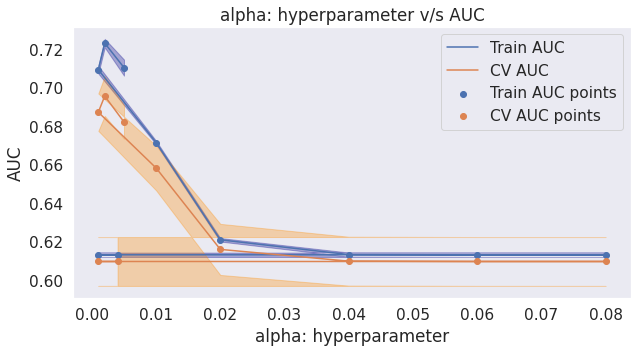

In [161]:
alphas = [0.005,0.002,0.001,0.01,0.02,0.04,0.06,0.08,0.001,0.004]
plt.figure(figsize=(10,5))
plt.plot(alphas, train_auc, label='Train AUC')
plt.gca().fill_between(alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(alphas, cv_auc, label='CV AUC')
plt.gca().fill_between(alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(alphas, train_auc, label='Train AUC points')
plt.scatter(alphas, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

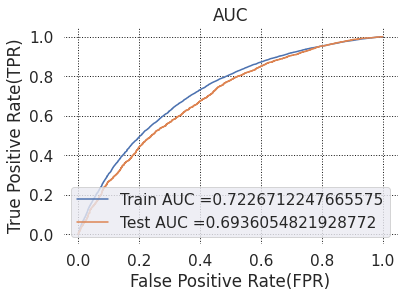

In [162]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV  #https://github.com/scikit-learn/scikit-learn/issues/7278

svm = SGDClassifier(alpha=bestAlpha_3,loss='hinge',class_weight='balanced')
svm.fit(x_w2v_train, y_train)
y_train_pred=svm.decision_function(x_w2v_train)
y_test_pred=svm.decision_function(x_w2v_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
ax = plt.subplot()
auc_set1_train=auc(train_fpr, train_tpr)
auc_set1_test=auc(test_fpr, test_tpr)
ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4442724713970431 for threshold -0.617
[[ 5468  2933]
 [15109 32490]]
the maximum value of tpr*(1-fpr) 0.4442724713970431 for threshold -0.617


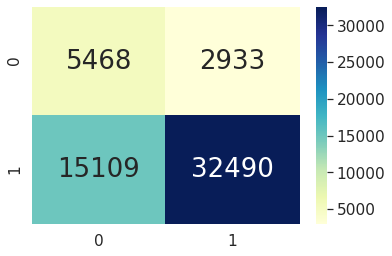

In [164]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
## https://likegeeks.com/seaborn-heatmap-tutorial/#Sequential-colormap
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.40588955582232894 for threshold 0.404
[[1881  219]
 [8648 3252]]
the maximum value of tpr*(1-fpr) 0.40588955582232894 for threshold 0.404


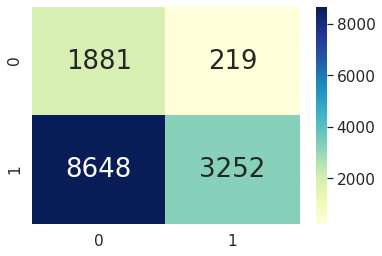

In [165]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

TFIDF-W2V

In [166]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
import math

parameters={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
svm = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(svm, parameters, cv=10, scoring='roc_auc',verbose=1,return_train_score=True)
clf.fit(x_tfidfw2v_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
bestAlpha_4=clf.best_params_['alpha']
bestScore_4=clf.best_score_
print("Best alpha: ",clf.best_params_['alpha']," BEST SCORE: ",clf.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.5min finished


Best alpha:  0.001  BEST SCORE:  0.6926213301912939


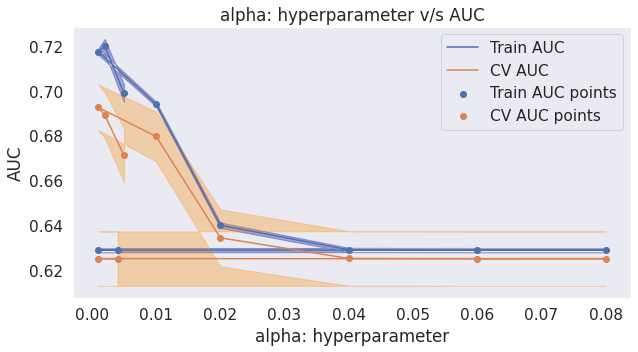

In [167]:
alphas = [0.005,0.002,0.001,0.01,0.02,0.04,0.06,0.08,0.001,0.004]
plt.figure(figsize=(10,5))
plt.plot(alphas, train_auc, label='Train AUC')
plt.gca().fill_between(alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(alphas, cv_auc, label='CV AUC')
plt.gca().fill_between(alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(alphas, train_auc, label='Train AUC points')
plt.scatter(alphas, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

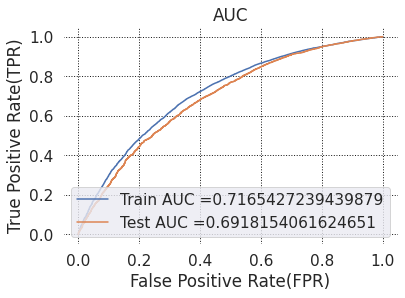

In [168]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV  #https://github.com/scikit-learn/scikit-learn/issues/7278

svm = SGDClassifier(alpha=bestAlpha_4,loss='hinge',class_weight='balanced')
svm.fit(x_tfidfw2v_train, y_train)
y_train_pred=svm.decision_function(x_tfidfw2v_train)
y_test_pred=svm.decision_function(x_tfidfw2v_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
ax = plt.subplot()
auc_set1_train=auc(train_fpr, train_tpr)
auc_set1_test=auc(test_fpr, test_tpr)
ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.44173768838623684 for threshold -0.171
[[ 5409  2992]
 [14942 32657]]
the maximum value of tpr*(1-fpr) 0.44173768838623684 for threshold -0.171


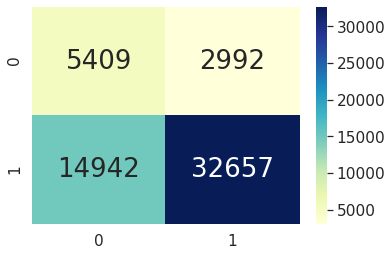

In [170]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
## https://likegeeks.com/seaborn-heatmap-tutorial/#Sequential-colormap
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.41081512605042014 for threshold 0.796
[[1877  223]
 [8793 3107]]
the maximum value of tpr*(1-fpr) 0.41081512605042014 for threshold 0.796


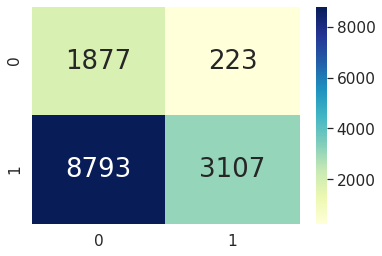

In [171]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [173]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
import math

parameters={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
svm = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(svm, parameters, cv=10, scoring='roc_auc',verbose=1,return_train_score=True)
clf.fit(X5_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
bestAlpha_5=clf.best_params_['alpha']
bestScore_5=clf.best_score_
print("Best alpha: ",clf.best_params_['alpha']," BEST SCORE: ",clf.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 42.2min finished


Best alpha:  0.0001  BEST SCORE:  0.6312738227324133


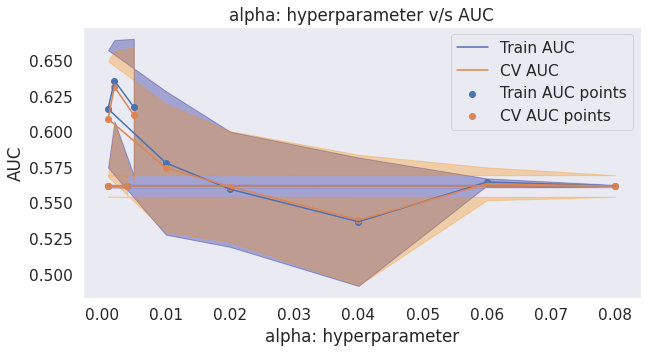

In [174]:
alphas = [0.005,0.002,0.001,0.01,0.02,0.04,0.06,0.08,0.001,0.004]
plt.figure(figsize=(10,5))
plt.plot(alphas, train_auc, label='Train AUC')
plt.gca().fill_between(alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(alphas, cv_auc, label='CV AUC')
plt.gca().fill_between(alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(alphas, train_auc, label='Train AUC points')
plt.scatter(alphas, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

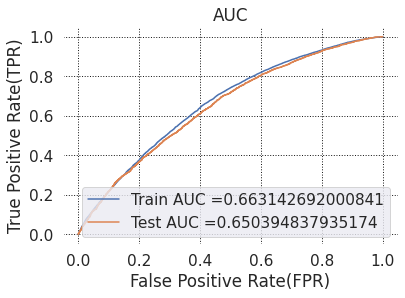

In [175]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV  #https://github.com/scikit-learn/scikit-learn/issues/7278

svm = SGDClassifier(alpha=bestAlpha_5,loss='hinge',class_weight='balanced')
svm.fit(X5_tr, y_train)
y_train_pred=svm.decision_function(X5_tr)
y_test_pred=svm.decision_function(X5_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
ax = plt.subplot()
auc_set1_train=auc(train_fpr, train_tpr)
auc_set1_test=auc(test_fpr, test_tpr)
ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3866644936437416 for threshold 5.264
[[ 4989  3412]
 [16607 30992]]
the maximum value of tpr*(1-fpr) 0.3866644936437416 for threshold 5.264


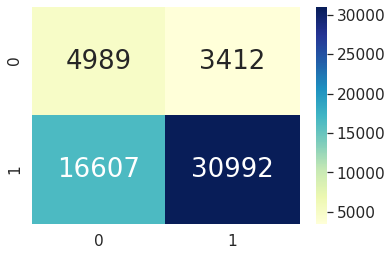

In [177]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
## https://likegeeks.com/seaborn-heatmap-tutorial/#Sequential-colormap
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3694545018007202 for threshold 18.536
[[1864  236]
 [9027 2873]]
the maximum value of tpr*(1-fpr) 0.3694545018007202 for threshold 18.536


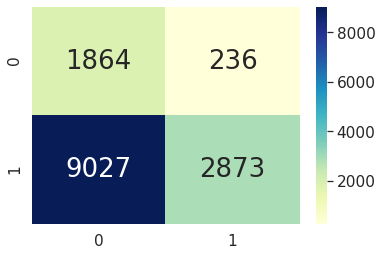

In [178]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

<h1>3. Conclusion</h1>

In [180]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", "AUC"]
x.add_row(["BOW", "SVM", 0.01, 0.71])
x.add_row(["TFIDF", "SVM", 0.0001, 0.70])
x.add_row(["AVG W2V", "SVM", 0.0001, 0.69])
x.add_row(["TFIDF W2V", "SVM", 0.001, 0.69])
x.add_row(["Task 5", "SVM", 0.0001, 0.63])
print(x)


+------------+-------+-----------------------+------+
| Vectorizer | Model | Alpha:Hyper Parameter | AUC  |
+------------+-------+-----------------------+------+
|    BOW     |  SVM  |          0.01         | 0.71 |
|   TFIDF    |  SVM  |         0.0001        | 0.7  |
|  AVG W2V   |  SVM  |         0.0001        | 0.69 |
| TFIDF W2V  |  SVM  |         0.001         | 0.69 |
|   Task 5   |  SVM  |         0.0001        | 0.63 |
+------------+-------+-----------------------+------+
